## The Data: Pima Indian Classification

### Problem statement 
Using the UCI PIMA Indian Diabetes dataset to predict a person has diabetes or not using the medical attributes provided. (Target is column 8)

### Assumptions

This is enough data to split and reliably predict if the patient has diabetes, the dataset has only 786 data points
Just these attributes are enough to diagnose the ailment
Similar Problems 
This is very much like some common 2 class classification problems like classifying mail into spam and ham based on the contents of the email. Obviously the attributes there would be strings and not numbers like this dataset, therefore the way in which we process at least some of the features will be different.

In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("data/pima-indians-diabetes.data",header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X=df[np.arange(8)]
y=df[8]

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: 8, Length: 768, dtype: int64

In [ ]:
#comparacion de todas los algoritmos vistos: K_N, 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [37]:
clf_KN=GridSearchCV(KNeighborsClassifier(n_neighbors=1),param_grid={"n_neighbors":range(2,40)},scoring="accuracy",cv=10)

In [21]:
clf_SVM=GridSearchCV(SVC(C=1,gamma=1),param_grid={"C":[10,100,1000,10000],"gamma":[10,100,1000,10000]},scoring="accuracy",cv=10)

In [43]:
clf_DeciTree=GridSearchCV(DecisionTreeClassifier(min_samples_leaf=20,max_depth=3),param_grid={"min_samples_leaf":[10,20,30,50,100],"max_depth":range(2,7)},scoring="accuracy",cv=10)

In [38]:
clf_KN.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(2, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [27]:
clf_SVM.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [10, 100, 1000, 10000], 'gamma': [10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [44]:
clf_DeciTree.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [10, 20, 30, 50, 100], 'max_depth': range(2, 7)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
#79% es la mejor accuracy que se ha obtenido.

#Mi mejor score para un k vecinos es un 75%
print(clf_KN.best_score_)

0.7552083333333334


In [32]:
#con kernel RBF, a la clase le da un 65% para el SVM
print(clf_SVM.best_score_)

0.6510416666666666


In [45]:
#con el arbol de decision sale un 73%
print(clf_DeciTree.best_score_)

0.7395833333333334


In [34]:
#Probamos con la regresion logistica
from sklearn.linear_model import LogisticRegression

In [35]:
clf_log=LogisticRegression()

In [36]:
cross_val_score(clf_log,X,y,scoring="accuracy",cv=10).mean()

0.7669685577580314

In [46]:
#la regresion logística ha sido la que mejor accuracy me ha dado, elejiría esta.

In [47]:
#¿Puedo combinar los clasificadores para obtener un mejor resultado?-->sí, hay diversos métodos.

#(ver apuntes libreta)
#Voy a separar los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:


clf_KN.fit(X_train,y_train)
clf_SVM.fit(X_train,y_train)
clf_DeciTree.fit(X_train,y_train)
clf_log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
#Para combinar:

#VOTING CLASSIFIER
from sklearn.ensemble import VotingClassifier

In [51]:
clf_voted=VotingClassifier(estimators=[("log",clf_log),("kneigh",clf_KN),("SVM",clf_SVM),("DecTree",clf_DeciTree)])

In [53]:
cross_val_score(clf_voted,X,y,scoring="accuracy",cv=10).mean()

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

0.7434723171565277

In [54]:
#Vemos que haciendo solo el logistico, los resultados son mejores.
#Esto nos lleva a decir que el combinar algoritmos no siempre nos da los mejores resultados.

In [58]:
#hay otra opcion: STACKING que es parecido al VOTING pero en vez de hacer una votacion, se aplica un algoritmo de ML.
#En el ejemplo de clase, se usa una Regr Logistica--> Ver el notebook del profesor.

In [ ]:
#...

In [56]:
#ENSEMBLED LEARNING
#Se pueden combinar los algoritmos en paralelo (como hemos hecho en el ejemplo anteiror:parallel learning), o en serie (boosted learned)

In [57]:
#Parallel learning:
#Puedo cambiar los datos de entrada (train) para cada modelo, al estar en paralelo. Y también el tipo del algoritmo que usa cada uno.
#En el Bagging, se usa el mismo algotitmo y se usa una votacion para sacar la salida

In [65]:
#Para hacer un bagging classifier:

#importacion del modelo base:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

clf_Bagg=BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100)
#Le indicamos también cuantos estimadores/clasificadores vamos a poner

In [66]:
cross_val_score(clf_Bagg,X,y,scoring="accuracy",cv=10).mean()

0.7695830485304169

In [64]:
#probando con un K_neigh
clf_Bagg_2=BaggingClassifier(base_estimato(n_neighbors=16),n_estimators=100)
cross_val_score(clf_Bagg_2,X,y,scoring="accuracy",cv=10).mean()

0.7383458646616542

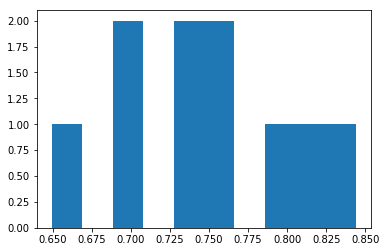

In [72]:
#El bagging classificator añade una componente aleatoria de cada ejecución, por ello lo mas justo sería hacerlo unas veces, coger la media y la desv. estándar.
plt.hist(cross_val_score(clf_Bagg_2,X,y,scoring="accuracy",cv=10));
#vemos el rango de variacion de la salida.

In [69]:
#La idea que hay que tener, es que afecta mucho mas al resultado los datos de entrada (datos de entreamiento) que los modelos que se usen.

In [74]:
#Out of Bag Erros:
#-No hace falta de hacer el split en train y test, el propio bagging lo hace, entrenando cada modelo con disintos set de datos.
#¿Como se hace esto con sklearn?
clf_Bagg=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=16),n_estimators=100,oob_score=True)


In [75]:
clf_Bagg.fit(X,y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [76]:
clf_Bagg.oob_score_

0.7552083333333334

In [77]:
#PASAMOS AL RANDOM FOREST
#No es mas que un bagging en el que el algoritmo/clasificador base es un arbol de decisión. Muchos arboles->Bosque


In [79]:
from sklearn.ensemble import RandomForestClassifier

clf_RF=RandomForestClassifier(min_samples_leaf=30,n_estimators=100)

In [80]:
cross_val_score(clf_RF,X,y,scoring="accuracy",cv=10).mean()

0.7669514695830485

In [81]:
cross_val_score(clf_RF,X,y,scoring="accuracy",cv=10).mean()

0.7539302802460697

In [82]:
#Vemos el componente aleatorio que ofrece el resultado cada vez que entrenamos.

In [83]:
clf_RF=RandomForestClassifier(min_samples_leaf=30,n_estimators=100,oob_score=True)

In [84]:
clf_RF.fit(X,y)
clf_RF.oob_score_

0.76171875

In [85]:
#Se puede accedeer individualmente a los estimadores
clf_RF.estimators_[0]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=608730620, splitter='best')

In [86]:
#Puedo dibujarlos

import pydotplus
#Hay que instalar pydotplus para que funciones si no funciona
#!conda install pydotplys (para MAC)

from IPython.display import Image
from sklearn import tree

dot_data=tree.export_graphviz(clf_RF.estimators_[3],
                              out_file=None,
                              filled=True,
                              rounded=True,
                             special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [88]:
#en el arlbol, alla donde se hace el corte, nos está indicando la variable más importante para hacer la decisión.

In [89]:
#Me gustaría ser capaz de combinar todos los arboles que componen el bosque para saber cual es la variable mas impotante:
#Podemos saberlo gracias a dos tecnicas:
#- Gini Importance.
#- Permutation Importance (es el que usa sklearn)

clf_RF.feature_importances_

array([0.05846313, 0.42668578, 0.02700178, 0.03332915, 0.04284292,
       0.18379069, 0.06629503, 0.16159152])

In [91]:
#la suma de esto deberia dar 1:
sum(clf_RF.feature_importances_)

1.0

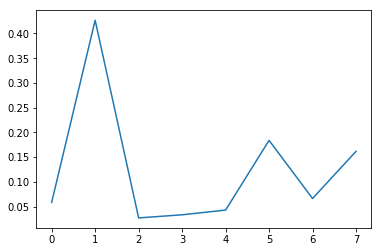

In [92]:
plt.plot(clf_RF.feature_importances_)

In [93]:
#Vemos que la variable mas importantees la 2 (etiqueta niveles de glucosa) seguida de la 6 (edad) son los que mas influyen en la predicicon de la diabetes.

In [96]:
#BOOSTED LEARNERS

#-Algoritmo ADABOOST
#Es un poco hibrido pq hace cosas tambien en paralelo. El clasificador original es SVM. La siguiente vez, en la separacion ve donde se ha equivocado y pone mas peso.
#Vuelve hacer la clasificacion (clasificador debil), y ahora tiene en cuenta los pesos anteriores para no equivocarse en los elementos que tienen mas peso. Vuelve a darse cuanta de donde se ha equivocado y vuelve a asignar pesos, y se repite el proceso.

from sklearn.ensemble import AdaBoostClassifier

clf_AdaB=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),n_estimators=100)

cross_val_score(clf_AdaB,X,y,scoring="accuracy",cv=10).mean()

0.7434894053315105

In [97]:
#Se podria pasar por un grid, pero habría que hacerlo varias veces por la aleatoriedad que mete el Random Forest

In [98]:
#-XGboost: Complexity.

#Este se usa mucho mas que el Adaboost.
#Boosted trees funcionan muy bien pq se trabaja en el error, el siguiente trabaja en el error del anterior. Se aprende de los datos y de lo que nos dá el bloque anteiror. Hay dos colaboraciones. Por eso es mas potente que el parallels. 
#ejemplo de esto en el notebook de Regression-MachinePerfromance
#antes de que aparecieran las Redes neuronales este metodo (boosted trees) ganaba todas las competiciones de kaggle.

#hay que buscar un compromiso entre exactutid y complejidad del modelo.
#esto se hace en este algoritmo mediante un descenso de gradiente.
#Mejoro el error si añado un depth al arbol?->Si->Lo añado. Pero para poder limitar la complejidad del modelo, añadimos la REGULARIZACIÓN (mide la complejidad del modelo)
#A=B+C
#Minimizar A implica minimizar B, pero C irá aumentando, si aumenta mucho, A no será minimo. De ahí la importancia de la complejidad (que es C en este caso)

In [99]:
#como se hace boosted tree en sklearn?
from sklearn.ensemble import GradientBoostingClassifier

clf_GBC=GradientBoostingClassifier(n_estimators=100)

cross_val_score(clf_GBC,X,y,scoring="accuracy",cv=10).mean()

0.7630041011619959

In [101]:
#La diferencia entre GradienteBoost y el XGBoost es la manerade calcular la funcion de coste, con el siguiente XGBoost la forma de calcularla es mucho mejor.
#!conda install -c conda-forge xgboost
from xgboost import XGBClassifier
#instanciamos el clasificador
clf_XGB=XGBClassifier(n_estimators=100)
cross_val_score(clf_XGB,X,y,scoring="accuracy",cv=10).mean()

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

0.7694805194805194

In [102]:
#vemos como ha mejorado un poco, gracias a la buena estimacion de la funcion de coste (optimization function).
#este valor vemos que es mejor que el valor de la Regresion logistica.
#Si no le decimos nada de max_depth va a evaluar el mismo cuando parar, si parar o crear una nueva rama evaluando la funcion de coste.

In [103]:
#en mac, hay un problema con esta librería. Para solucionarlo,hay que modificar una variables de sistema (algo poco recomendable):
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

In [104]:
#Lo primero que probamos siempre es Random Forest y XGBoost,que son los que mejor resultado dan de lejos.